In [14]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [16]:
life_expectancy = pd.read_csv('Life-Expectancy-Data-Updated.csv')
life_expectancy_head = life_expectancy.head()

In [17]:
life_expectancy_head.to_csv('df_head.csv')

In [4]:
# General sample info
countries = life_expectancy['Country'].unique()
years = life_expectancy['Year'].unique()
print(len(countries))
print(len(years))

179
16


In [19]:
columns = life_expectancy.columns
columns

Index(['Country', 'Region', 'Year', 'Infant_deaths', 'Under_five_deaths',
       'Adult_mortality', 'Alcohol_consumption', 'Hepatitis_B', 'Measles',
       'BMI', 'Polio', 'Diphtheria', 'Incidents_HIV', 'GDP_per_capita',
       'Population_mln', 'Thinness_ten_nineteen_years',
       'Thinness_five_nine_years', 'Schooling', 'Economy_status_Developed',
       'Economy_status_Developing', 'Life_expectancy'],
      dtype='object')

In [51]:
developed = life_expectancy.query('Economy_status_Developed==1')
undeveloped = life_expectancy.query('Economy_status_Developing == 1')

In [23]:
# check for na's
life_expectancy.isna()

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2859,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2860,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2861,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2862,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [24]:
# check for duplicates
duplicate_countries = life_expectancy[life_expectancy.duplicated(subset=['Country','Year'],keep=False)==True]
duplicate_countries['Country'].unique()

array([], dtype=object)

In [25]:
# Summary Statistics -- add in other columns of interest -- figure out how to round numbers
# dataset includes 179 countries, data from 16 years (2000-2015)

sum_stats = life_expectancy[['Infant_deaths', 'Under_five_deaths',
       'Adult_mortality', 'Alcohol_consumption', 'Hepatitis_B', 'Measles',
       'BMI', 'Polio', 'Diphtheria', 'Incidents_HIV', 'GDP_per_capita',
       'Population_mln', 'Schooling', 'Life_expectancy']].describe()
sum_stats.rename(columns={'Infant_deaths':'Infant Deaths', 'Under_five_deaths':'Under Five Deaths',
                          'Adult_mortality':'Adult Mortality', 'Alcohol_consumption':'Alcohol Consumption', 
                          'Hepatitis_B':'Hepatitis B', 'Incidents_HIV':'Incidents HIV', 
                          'GDP_per_capita':'GDP per capita','Population_mln':'Population (Millions)',
                          'Schooling':'Years of Schooling', 'Life_expectancy':'Life Expectancy'},inplace=True)
sum_stats = sum_stats.round(2)
sum_stats


,Infant Deaths,Under Five Deaths,Adult Mortality,Alcohol Consumption,Hepatitis B,Measles,BMI,Polio,Diphtheria,Incidents HIV,GDP per capita,Population (Millions),Years of Schooling,Life Expectancy
count,2864.00,2864.00,2864.00,2864.00,2864.00,2864.00,2864.00,2864.00,2864.00,2864.00,2864.00,2864.00,2864.00,2864.00
mean,30.36,42.94,192.25,4.82,84.29,77.34,25.03,86.50,86.27,0.89,11540.92,36.68,7.63,68.86
std,27.54,44.57,114.91,3.98,16.00,18.66,2.19,15.08,15.53,2.38,16934.79,136.49,3.17,9.41
min,1.80,2.30,49.38,0.00,12.00,10.00,19.80,8.00,16.00,0.01,148.00,0.08,1.10,39.40
25%,8.10,9.67,106.91,1.20,78.00,64.00,23.20,81.00,81.00,0.08,1415.75,2.10,5.10,62.70
50%,19.60,23.10,163.84,4.02,89.00,83.00,25.50,93.00,93.00,0.15,4217.00,7.85,7.80,71.40
75%,47.35,66.00,246.79,7.78,96.00,93.00,26.40,97.00,97.00,0.46,12557.00,23.69,10.30,75.40
max,138.10,224.90,719.36,17.87,99.00,99.00,32.10,99.00,99.00,21.68,112418.00,1379.86,14.10,83.80


In [26]:
sum_stats.to_csv('summarystats.csv')

In [62]:
gdp_bins = [0, 1416, 4218, 12558, 112418]

labels = ["<1416", "1416-4218", "4218-12558", "12558-112418"]
developed["GDP Ranges"] = pd.cut(developed['GDP_per_capita'],gdp_bins,labels=labels)
developed.groupby('GDP Ranges').mean().reset_index(inplace=True)
developed

/var/folders/tf/jtj87yg57613h56rlkc7jv0w0000gn/T/ipykernel_11718/1212984933.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  developed["GDP Ranges"] = pd.cut(developed['GDP_per_capita'],gdp_bins,labels=labels)
/var/folders/tf/jtj87yg57613h56rlkc7jv0w0000gn/T/ipykernel_11718/1212984933.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  developed.groupby('GDP Ranges').mean().reset_index(inplace=True)


,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy,GDP Ranges
1,Spain,European Union,2015,2.7,3.3,57.9025,10.35,97,94,26.0,...,0.09,25742,46.44,0.6,0.5,9.7,1,0,82.8,12558-112418
4,Israel,Middle East,2012,3.4,4.3,57.9510,2.89,97,89,27.0,...,0.08,33995,7.91,1.2,1.1,12.8,1,0,81.7,12558-112418
7,Hungary,European Union,2000,8.7,10.1,192.9690,12.23,88,99,25.9,...,0.08,8971,10.21,2.3,2.3,10.2,1,0,71.2,4218-12558
11,Malta,European Union,2007,6.0,6.8,58.0185,7.47,82,77,27.1,...,0.08,19338,0.41,0.7,0.7,9.9,1,0,79.8,12558-112418
14,Switzerland,Rest of Europe,2006,4.2,4.9,63.2435,10.24,88,71,25.0,...,0.08,79368,7.48,0.6,0.4,12.3,1,0,81.5,12558-112418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2850,Belgium,European Union,2009,3.7,4.5,84.1680,10.10,97,83,25.9,...,0.08,39025,10.80,0.9,0.9,11.1,1,0,80.0,12558-112418
2855,Finland,European Union,2001,3.4,4.2,98.8365,8.94,88,92,25.8,...,0.08,38785,5.19,0.9,0.8,9.4,1,0,78.0,12558-112418
2856,Japan,Asia,2014,2.1,2.8,55.5820,8.40,83,94,22.7,...,0.17,34387,127.28,2.0,1.7,12.5,1,0,83.6,12558-112418
2862,Lithuania,European Union,2002,7.9,9.9,204.0120,11.00,94,95,26.1,...,0.05,7424,3.44,3.3,3.3,11.1,1,0,71.8,4218-12558


In [63]:
undeveloped["GDP Ranges"] = pd.cut(undeveloped['GDP_per_capita'],gdp_bins,labels=labels)
undeveloped.groupby('GDP Ranges').mean().reset_index(inplace=True)
undeveloped

/var/folders/tf/jtj87yg57613h56rlkc7jv0w0000gn/T/ipykernel_11718/204815434.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  undeveloped["GDP Ranges"] = pd.cut(undeveloped['GDP_per_capita'],gdp_bins,labels=labels)
/var/folders/tf/jtj87yg57613h56rlkc7jv0w0000gn/T/ipykernel_11718/204815434.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  undeveloped.groupby('GDP Ranges').mean().reset_index(inplace=True)


,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy,GDP Ranges
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.320,97,65,27.8,...,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5,4218-12558
2,India,Asia,2007,51.5,67.9,201.0765,1.570,60,35,21.2,...,0.13,1076,1183.21,27.1,28.0,5.0,0,1,65.4,<1416
3,Guyana,South America,2006,32.8,40.5,222.1965,5.680,93,74,25.3,...,0.79,4146,0.75,5.7,5.5,7.9,0,1,67.0,1416-4218
5,Costa Rica,Central America and Caribbean,2006,9.8,11.2,95.2200,4.190,88,86,26.4,...,0.16,9110,4.35,2.0,1.9,7.9,0,1,78.2,4218-12558
6,Russian Federation,Rest of Europe,2015,6.6,8.2,223.0000,8.060,97,97,26.2,...,0.08,9313,144.10,2.3,2.3,12.0,0,1,71.2,4218-12558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2857,Belarus,Rest of Europe,2000,9.9,12.7,239.7160,12.920,70,92,25.7,...,0.05,2617,9.98,2.7,2.8,8.9,0,1,68.9,1416-4218
2858,"Iran, Islamic Rep.",Middle East,2007,19.7,23.1,129.9335,0.023,97,65,25.6,...,0.14,5305,71.34,7.5,7.8,8.9,0,1,72.6,4218-12558
2859,Niger,Africa,2000,97.0,224.9,291.8240,0.092,72,64,20.8,...,0.49,399,11.33,12.8,12.9,1.1,0,1,49.9,<1416
2860,Mongolia,Asia,2009,23.9,28.6,235.2330,6.560,97,97,25.3,...,0.02,2515,2.67,2.2,2.3,9.1,0,1,66.9,1416-4218


In [64]:
life_expectancy["GDP Ranges"] = pd.cut(life_expectancy['GDP_per_capita'],gdp_bins,labels=labels)
life_expectancy

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy,GDP Ranges
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.320,97,65,27.8,...,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5,4218-12558
1,Spain,European Union,2015,2.7,3.3,57.9025,10.350,97,94,26.0,...,0.09,25742,46.44,0.6,0.5,9.7,1,0,82.8,12558-112418
2,India,Asia,2007,51.5,67.9,201.0765,1.570,60,35,21.2,...,0.13,1076,1183.21,27.1,28.0,5.0,0,1,65.4,<1416
3,Guyana,South America,2006,32.8,40.5,222.1965,5.680,93,74,25.3,...,0.79,4146,0.75,5.7,5.5,7.9,0,1,67.0,1416-4218
4,Israel,Middle East,2012,3.4,4.3,57.9510,2.890,97,89,27.0,...,0.08,33995,7.91,1.2,1.1,12.8,1,0,81.7,12558-112418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2859,Niger,Africa,2000,97.0,224.9,291.8240,0.092,72,64,20.8,...,0.49,399,11.33,12.8,12.9,1.1,0,1,49.9,<1416
2860,Mongolia,Asia,2009,23.9,28.6,235.2330,6.560,97,97,25.3,...,0.02,2515,2.67,2.2,2.3,9.1,0,1,66.9,1416-4218
2861,Sri Lanka,Asia,2004,17.7,28.9,134.8950,1.560,62,95,21.9,...,0.02,2130,19.39,15.4,15.5,10.3,0,1,74.3,1416-4218
2862,Lithuania,European Union,2002,7.9,9.9,204.0120,11.000,94,95,26.1,...,0.05,7424,3.44,3.3,3.3,11.1,1,0,71.8,4218-12558


In [65]:
# LIFE EXPECTANCY BY REGION (T-TEST)
le_developed_mean = life_expectancy.query('Economy_status_Developed==1')['Life_expectancy'].mean()
print(le_developed_mean)
le_developing_mean = life_expectancy.query('Economy_status_Developed==0')['Life_expectancy'].mean()
print(le_developing_mean)

stats.ttest_ind(life_expectancy.query('Economy_status_Developed==1')['Life_expectancy'],
                life_expectancy.query('Economy_status_Developed==0')['Life_expectancy'],equal_var=False)

78.50574324324323
66.34172535211268


Ttest_indResult(statistic=53.68486022748816, pvalue=0.0)

In [66]:
# LIFE EXPECTANCY BY REGION (T-TEST)
gdp_developed_mean = life_expectancy.query('Economy_status_Developed==1')['GDP_per_capita'].mean()
print(gdp_developed_mean)
gdp_undeveloped_mean = life_expectancy.query('Economy_status_Developed==0')['GDP_per_capita'].mean()
print(gdp_undeveloped_mean)

stats.ttest_ind(life_expectancy.query('Economy_status_Developed==1')['GDP_per_capita'],
                life_expectancy.query('Economy_status_Developed==0')['GDP_per_capita'],equal_var=False)

33683.5472972973
5771.368397887324


Ttest_indResult(statistic=31.127797009853566, pvalue=9.317764506610166e-131)

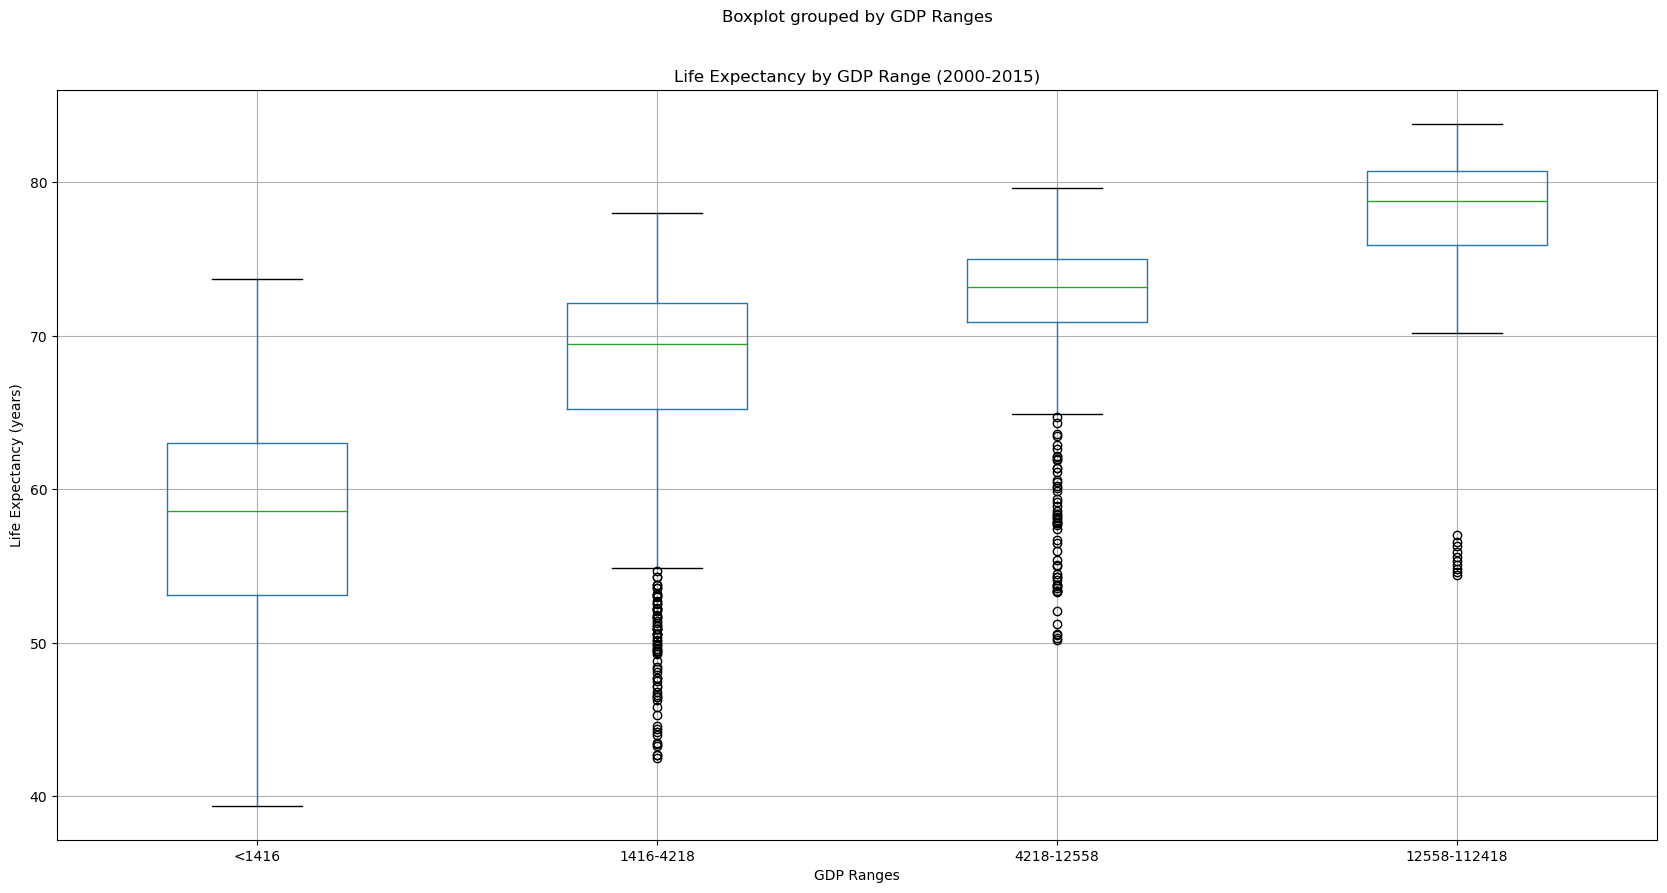

F_onewayResult(statistic=625.4755890129329, pvalue=1.045725475514985e-214)


In [67]:
# LIFE EXPECTANCY vs. GDP RANGES (ANOVA)
life_expectancy.boxplot('Life_expectancy', by = 'GDP Ranges', figsize=(20,10))
plt.title('Life Expectancy by GDP Range (2000-2015)')
plt.ylabel('Life Expectancy (years)')
plt.savefig('life_expect_gdp.png')
plt.show()

# Extract individual groups
group0 = life_expectancy[life_expectancy['GDP Ranges']=="<1416"]['Life_expectancy']
group1 = life_expectancy[life_expectancy['GDP Ranges']=="1416-4218"]['Life_expectancy']
group2 = life_expectancy[life_expectancy['GDP Ranges']=="4218-12558"]['Life_expectancy']
group3 = life_expectancy[life_expectancy['GDP Ranges']=="12558-112418"]['Life_expectancy']

# ANOVA Test
print(stats.f_oneway(group1,group2,group3))

In [68]:
# By country, in 2015? 
twentyfifteen = life_expectancy.query('Year==2015')
twentyfifteen_region = twentyfifteen.groupby('Region').mean().reset_index()

/var/folders/tf/jtj87yg57613h56rlkc7jv0w0000gn/T/ipykernel_11718/3079361763.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  twentyfifteen_region = twentyfifteen.groupby('Region').mean().reset_index()


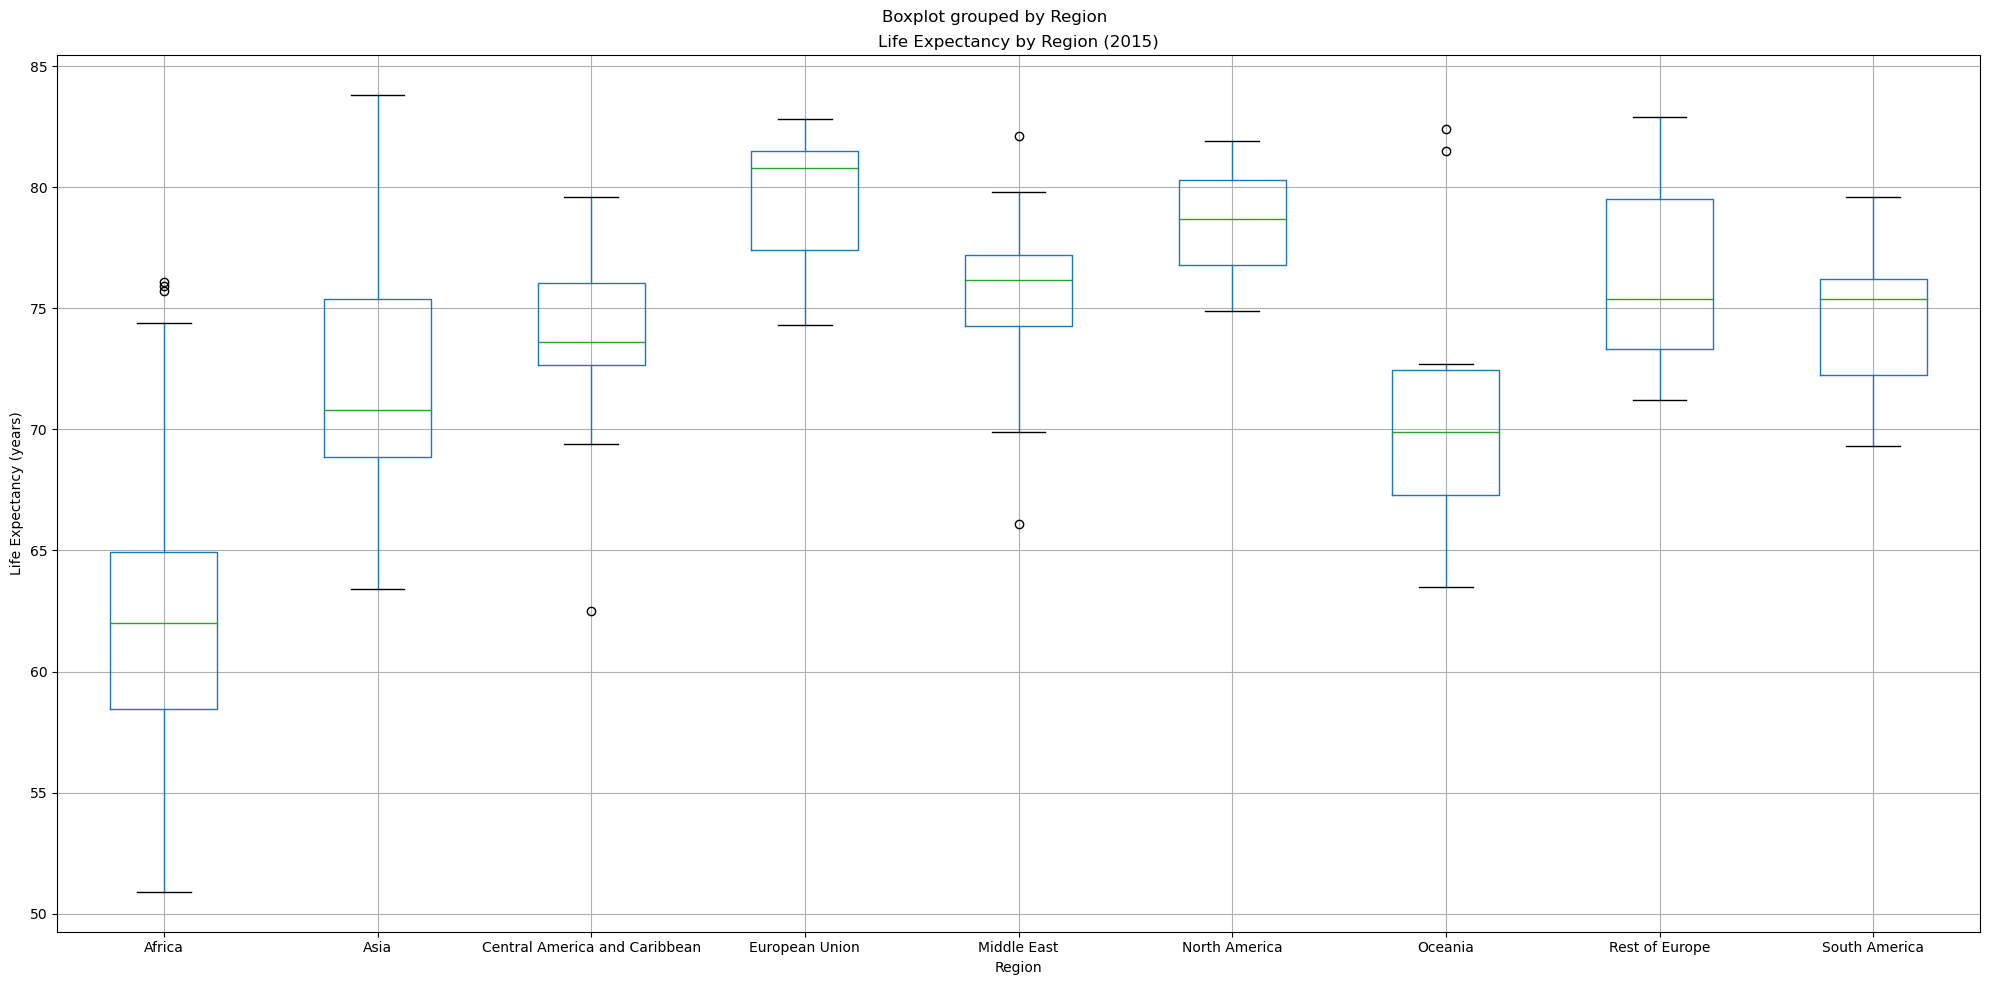

F_onewayResult(statistic=29.12907375646511, pvalue=9.427455249816252e-14)
F_onewayResult(statistic=6.084491177201229, pvalue=0.0003136531814695706)
Ttest_indResult(statistic=-16.210284856011086, pvalue=4.1670091577619766e-26)
Ttest_indResult(statistic=-4.355514075379879, pvalue=0.0005256852585791375)
Ttest_indResult(statistic=0.48245595292856824, pvalue=0.6715245848039528)


In [69]:
twentyfifteen.boxplot('Life_expectancy', by = 'Region', figsize=(20,10))
plt.title('Life Expectancy by Region (2015)')
plt.ylabel('Life Expectancy (years)')
plt.tight_layout()
plt.savefig('2015_regional_boxplot.png')
plt.show()

# Extract individual groups
africa = twentyfifteen[twentyfifteen['Region']=="Africa"]['Life_expectancy']
asia = twentyfifteen[twentyfifteen['Region']=="Asia"]['Life_expectancy']
cacaribbean = twentyfifteen[twentyfifteen['Region']=="Central America and Caribbean"]['Life_expectancy']
europeanunion = twentyfifteen[twentyfifteen['Region']=="European Union"]['Life_expectancy']
middleeast = twentyfifteen[twentyfifteen['Region']=="Middle East"]['Life_expectancy']
northamerica = twentyfifteen[twentyfifteen['Region']=="North America"]['Life_expectancy']
oceania = twentyfifteen[twentyfifteen['Region']=="Oceania"]['Life_expectancy']
restofeurope = twentyfifteen[twentyfifteen['Region']=="Rest of Europe"]['Life_expectancy']
southamerica = twentyfifteen[twentyfifteen['Region']=="South America"]['Life_expectancy']

# ANOVA Test under 75 vs over 
print(stats.f_oneway(africa,oceania,asia,cacaribbean))
print(stats.f_oneway(europeanunion,middleeast,northamerica,southamerica,restofeurope))

# T-test (lowest/highest,lowest/second lowest, highest/second highest)
print(stats.ttest_ind(africa,europeanunion,equal_var=False))
print(stats.ttest_ind(africa,oceania,equal_var=False))
print(stats.ttest_ind(europeanunion,northamerica,equal_var=False))

In [70]:
twentyfifteen_region['Life_expectancy'].mean()

73.74065236041844

In [71]:
# Set up expected values for expected life expectancy values
twentyfifteen_region['Expected LE']=[73.7406523604184,73.7406523604184,73.7406523604184,73.7406523604184,73.7406523604184,
                                    73.7406523604184,73.7406523604184,73.7406523604184,73.7406523604184]
print(twentyfifteen_region['Expected LE'].sum())
print(twentyfifteen_region['Life_expectancy'].sum())


663.6658712437655
663.665871243766


In [72]:
# CHI SQUARE: LIFE EXPECTANCY BY REGION IN 2015 
stats.chisquare(twentyfifteen_region['Life_expectancy'],twentyfifteen_region['Expected LE'])

Power_divergenceResult(statistic=2.7475816130544928, pvalue=0.9491862036856972)

In [ ]:
# ADD- TEST COMPARING ONE REGION IN TWO YEARS